<a href="https://colab.research.google.com/github/yunadla/MaritimeDataMining/blob/main/4%EB%B2%88%EC%A7%B8_%EA%B3%BC%EC%A0%9C_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#과제 1

import pandas as pd
import numpy as np

# github의 자동차 생산 자료를 읽어들인다
path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path + 'vehicle_prod.csv'
df = pd.read_csv(file, index_col=0)

# 숫자형 컬럼에 대해 각 년도별 합계를 구하여 'Total' 행을 생성
total = df.select_dtypes(np.number).sum().rename('Total')

# 숫자형 컬럼에 대해 각 년도별 평균 값을 구하여 'Average' 행을 생성
average = df.select_dtypes(np.number).mean().rename('Average')

# df.append()를 이용하여 'Total' 행과 'Average' 행을 기존 DataFrame에 추가
df_appended = df.append(total.to_frame().T)
df_appended = df_appended.append(average.to_frame().T)
df_appended = df_appended.round(2)
df_appended

<ipython-input-9-b14cc3f1a016>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_appended = df.append(total.to_frame().T)
<ipython-input-9-b14cc3f1a016>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_appended = df_appended.append(average.to_frame().T)


,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54
Total,54.12,50.77,45.04,55.68,57.25
Average,9.02,8.46,7.51,9.28,9.54


<ipython-input-4-d0a9c78943eb>:20: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  monthly_wind[i] = monthly[i].mean()['평균풍속']
<ipython-input-4-d0a9c78943eb>:20: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  monthly_wind[i] = monthly[i].mean()['평균풍속']
<ipython-input-4-d0a9c78943eb>:20: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only 

Text(0, 0.5, 'wind speed')

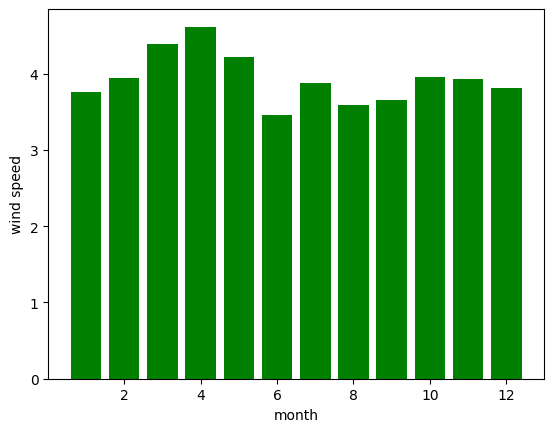

In [4]:
#과제 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
weather_file = path + 'weather.csv'

weather = pd.read_csv(weather_file, encoding='CP949')

# '평균풍속' 컬럼의 결측치를 전체 평균값으로 채워준다.
weather['평균풍속'].fillna(weather['평균풍속'].mean(), inplace=True)

# '일시' 컬럼을 이용하여 각 행의 월 정보를 생성한다.
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly = [None for x in range(12)]
monthly_wind = [0 for x in range(12)]
for i in range(12):
    monthly[i] = weather[weather['month'] == i+1]
    monthly_wind[i] = monthly[i].mean()['평균풍속']

months = np.arange(1, 13)
plt.bar(months, monthly_wind, color='green')
plt.xlabel('month')
plt.ylabel('wind speed')

